[Accueil](../../index.ipynb) > [6.3 diviser pour régner](index.ipynb)

Comparaison des différentes implémentations de la méthode puissance
=======


In [4]:
def puissanceA(x, n):
    """
    Retourne x à la puissance n
    en utilisant la récursivité basique
    """
    if n==0:
        return 1
    else:
        return x*puissanceA(x, n-1)

puissanceA(2,6)

64

In [5]:
def puissanceB(x,n):
    """
    Retourne x à la puissance n
    en utilisant la méthode diviser pour régner    
    """
    if n == 0:
        return 1
    elif n%2 == 0:
        return puissanceB(x*x , n//2)
    else:
        return x * puissanceB(x*x , (n-1)//2)

puissanceB(2,6)

64

Test sur le temps d'execution.

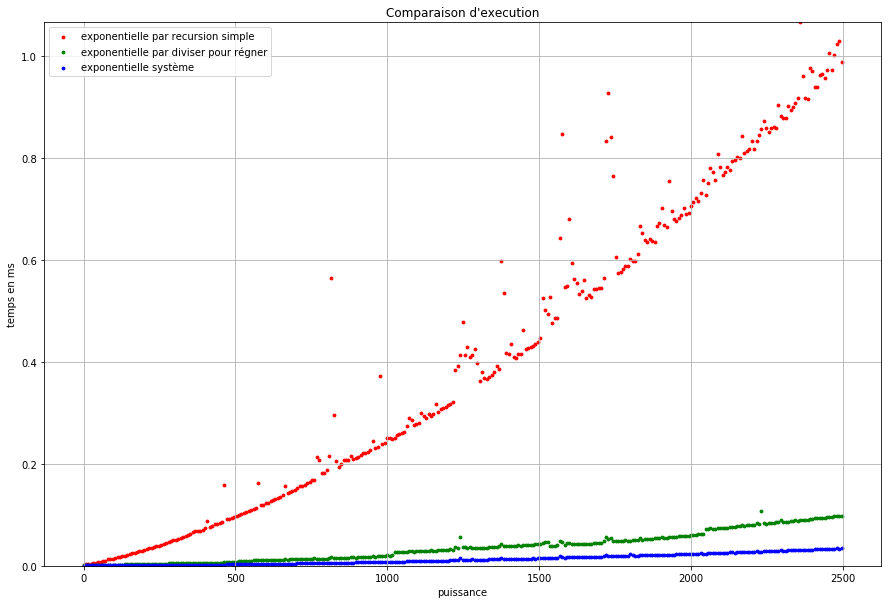

In [14]:
import timeit
import matplotlib.pyplot as plt

# faisons une liste des puissance et du pas
puissances = [i for i in range(0, 2500, 8)]
resultsA=[]
resultsB=[]
resultsC=[]
# On teste sur ce nombre
number=60
for p in puissances:
    # Cas de la puissance recursive basique
    starttime = timeit.default_timer()
    puissanceA(number,p)
    diffA=timeit.default_timer() - starttime
    resultsA.append(diffA)
    # Cas de la puissance recursive diviser pour régner
    starttime = timeit.default_timer()
    puissanceB(number,p)
    diffB=timeit.default_timer() - starttime
    resultsB.append(diffB)
    # Cas de la puissance système
    starttime = timeit.default_timer()
    number**p
    diffC=timeit.default_timer() - starttime
    resultsC.append(diffC)

# création du graphique de points
x = [p for p in puissances]
yA = [r*1000 for r in resultsA]
yB = [r*1000 for r in resultsB]
yC = [r*1000 for r in resultsC]

plt.figure(figsize=(15,10))
plt.ylim(top=1000*max(resultsA))
plt.scatter(x,yA, c='red', s=8, label="exponentielle par recursion simple")
plt.scatter(x,yB, c='green', s=8, label="exponentielle par diviser pour régner")
plt.scatter(x,yC, c='blue', s=8, label="exponentielle système")
plt.grid(which='both')
plt.title("Comparaison d'execution")
plt.xlabel('puissance')
plt.ylabel('temps en ms')
plt.legend(loc='upper left')
plt.show()